In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D 
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [9]:
TRAIN_DIR = '/Users/neelpatel/Downloads/train/'
TEST_DIR = '/Users/neelpatel/Downloads/test 2/'

In [34]:
def load_dataset(directory):
    image_paths = []
    labels = []
    
    for label in os.listdir(directory):
        for filename in os.listdir(directory+label):
            image_path = os.path.join(directory, label, filename)
            image_paths.append(image_path)
            labels.append(label)
            
        print(label, "Completed")
        
    return image_paths, labels


In [11]:
train = pd.DataFrame()
train['image'], train['label'] = load_dataset(TRAIN_DIR)
# shuffle the dataset
train = train.sample(frac=1).reset_index(drop=True)
train.head()

happy Completed
sad Completed
fear Completed
surprise Completed
neutral Completed
angry Completed
disgust Completed


,image,label
0,/Users/neelpatel/Downloads/train/surprise/Trai...,surprise
1,/Users/neelpatel/Downloads/train/angry/Trainin...,angry
2,/Users/neelpatel/Downloads/train/happy/Trainin...,happy
3,/Users/neelpatel/Downloads/train/happy/Trainin...,happy
4,/Users/neelpatel/Downloads/train/sad/Training_...,sad


In [12]:
test = pd.DataFrame()
test['image'], test['label'] = load_dataset(TEST_DIR)
test.head()

happy Completed
sad Completed
fear Completed
surprise Completed
neutral Completed
angry Completed
disgust Completed


,image,label
0,/Users/neelpatel/Downloads/test 2/happy/Privat...,happy
1,/Users/neelpatel/Downloads/test 2/happy/Privat...,happy
2,/Users/neelpatel/Downloads/test 2/happy/Public...,happy
3,/Users/neelpatel/Downloads/test 2/happy/Privat...,happy
4,/Users/neelpatel/Downloads/test 2/happy/Public...,happy


<AxesSubplot:xlabel='label', ylabel='count'>

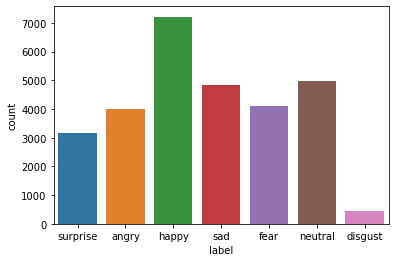

In [13]:
sns.countplot(train['label'])

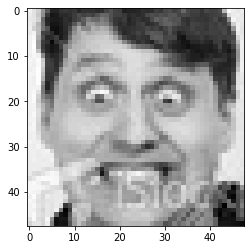

In [14]:
from PIL import Image
img = Image.open(train['image'][0])
plt.imshow(img, cmap='gray');

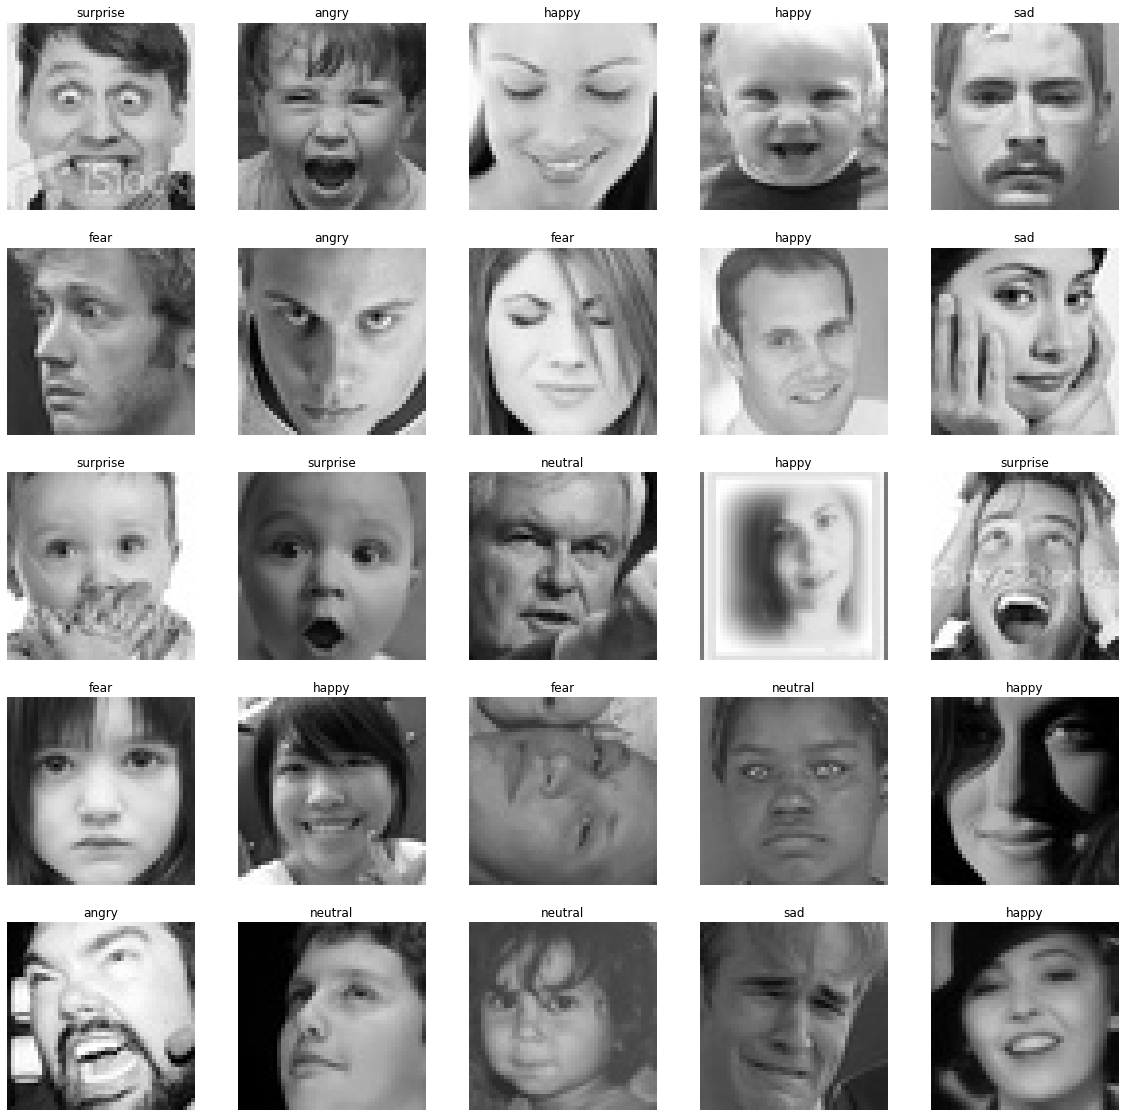

In [15]:
plt.figure(figsize=(20,20))
files = train.iloc[0:25]

for index, file, label in files.itertuples():
    plt.subplot(5, 5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')

In [16]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, grayscale=True)
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features

In [17]:
train_features = extract_features(train['image'])
test_features = extract_features(test['image'])


  0%|          | 0/28709 [00:00<?, ?it/s]

  0%|          | 0/7178 [00:00<?, ?it/s]

In [18]:
x_train = train_features/255.0
x_test = test_features/255.0
## convert label to integer
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train['label'])
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [19]:
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

In [20]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [21]:
input_shape = (48, 48, 1)
output_class = 7

In [22]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(output_class, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

Metal device set to: Apple M1


2022-05-16 14:06:03.980505: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-16 14:06:03.981694: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [23]:
history = model.fit(x=x_train, y=y_train, batch_size=128, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100


2022-05-16 14:06:22.365505: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-16 14:06:22.825616: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


225/225 [==============================] - ETA: 0s - loss: 1.8234 - accuracy: 0.2461

2022-05-16 14:07:14.413892: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


225/225 [==============================] - 55s 227ms/step - loss: 1.8234 - accuracy: 0.2461 - val_loss: 1.8112 - val_accuracy: 0.2471
Epoch 2/100
225/225 [==============================] - 50s 221ms/step - loss: 1.8005 - accuracy: 0.2513 - val_loss: 1.7790 - val_accuracy: 0.2474
Epoch 3/100
225/225 [==============================] - 50s 222ms/step - loss: 1.7191 - accuracy: 0.2936 - val_loss: 1.6207 - val_accuracy: 0.3398
Epoch 4/100
225/225 [==============================] - 50s 222ms/step - loss: 1.5912 - accuracy: 0.3655 - val_loss: 1.4454 - val_accuracy: 0.4398
Epoch 5/100
225/225 [==============================] - 50s 221ms/step - loss: 1.4851 - accuracy: 0.4242 - val_loss: 1.3724 - val_accuracy: 0.4730
Epoch 6/100
225/225 [==============================] - 50s 223ms/step - loss: 1.4173 - accuracy: 0.4523 - val_loss: 1.3184 - val_accuracy: 0.4929
Epoch 7/100
225/225 [==============================] - 492s 2s/step - loss: 1.3781 - accuracy: 0.4678 - val_loss: 1.2993 - val_accuracy:

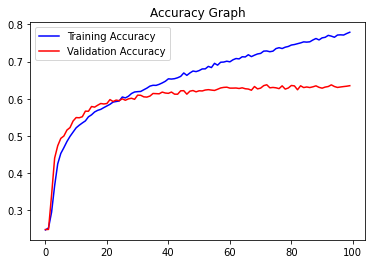

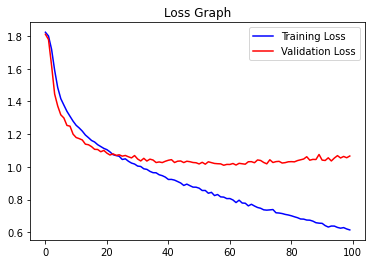

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()

plt.show()

Original Output: angry
Predicted Output: sad


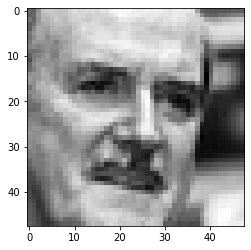

In [35]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

Original Output: happy
Predicted Output: happy


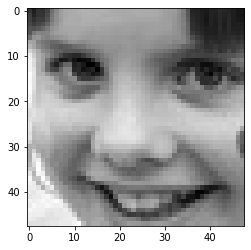

In [50]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

Original Output: happy
Predicted Output: disgust


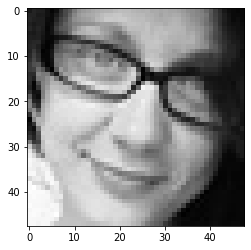

In [39]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');